# Fraud Detection Project

## Collaboration Plan
**Participants:** Ryan Tang and Santiago von Straussburg

**Github Page**: ryantangmj.github.io

### Overview
We are collaboratively analyzing two fraud datasets to explore fraud patterns, feature importance, and machine learning model evaluation.

- **First dataset:** `Cargo_fraud_only.csv`, obtained from [UCR Database](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)
- **Second dataset:** Twelve-month and one-month arrest data for fraud, obtained from [UCR Database](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)

### Technologies Used
1. **GitHub Repository**: For version control, code collaboration, and final project hosting.
2. **Google Colab/Jupyter Notebooks**: For ETL, EDA, and model development.
3. **Discord**: Primary communication platform for real-time discussions.
   - Weekly meetings at 08:00 PM CST on Thursdays for progress reviews and planning.

### Current Focus
Both team members are currently working together on data exploration, including Extraction, Transformation, and Load (ETL) processes, as well as Exploratory Data Analysis (EDA).

### Roadmap & Milestones
#### Milestone 1 – Initial Dataset Selection & ETL
- Identify datasets. - **Completed**
- Perform initial ETL on datasets. - **Completed**
- Establish a GitHub repository and GitHub Pages site. - **Completed**
- Develop basic statistics and initial graph for dataset understanding. - **Completed**

#### Milestone 2 – Additional ETL & Exploratory Data Analysis
- Continue data cleaning and transformation.
- Conduct comprehensive EDA with 3-5 key graphs.
- Present the first project pitch with initial findings.

#### Deliverable 1 – In-Class Presentation
- Finalize and present a 5-7 slide deck covering problem statement, ETL, EDA, and project progress.

#### Milestone 3 – Model Development & Evaluation
- Select machine learning models (Random Forest, XGBoost, Logistic Regression).
- Begin model training and evaluation.
- Analyze model performance and feature importance.

#### Deliverable 2 – Final Website & Presentation
- Finalize project with the deployment of results to the GitHub Pages site.
- Prepare the final presentation summarizing the project lifecycle.

---

## Project Goals

The goal of this collaborative project is to analyze fraud patterns, identify significant features contributing to fraud, and evaluate various machine learning models for fraud detection. By leveraging two distinct datasets, we aim to develop a deep understanding of fraudulent behavior and build predictive models that will aid in identifying and mitigating fraud across different sectors. Specifically, our objectives are as follows:

### 1. Fraud Pattern Analysis
- **Objective:** Investigate patterns and trends in fraud activities across different sectors, particularly cargo-related fraud and arrest data for fraud cases. This will involve examining how fraudulent activities vary over time and geographic locations, and identifying key factors that influence fraud prevalence.

### 2. Feature Importance Assessment
- **Objective:** Analyze and rank the importance of different features contributing to fraud detection. By evaluating features such as transaction details, timestamps, geographic data, and socio-economic indicators, we aim to pinpoint the key variables that can most accurately predict fraud occurrences.

### 3. Machine Learning Model Development & Evaluation
- **Objective:** Develop and compare multiple machine learning models (Random Forest, XGBoost, Logistic Regression) to identify the most effective model for predicting fraud cases. The models will be evaluated on their performance using metrics such as accuracy, precision, recall, and F1-score to ensure robust fraud detection capabilities.

### 4. Comprehensive Data Analysis
- **Objective:** Through thorough data exploration and analysis, we aim to create a holistic view of fraud activities, utilizing exploratory data analysis (EDA) techniques. This will include visualizing fraud trends, uncovering hidden relationships, and establishing baseline statistics.

### 5. Actionable Insights & Final Presentation
- **Objective:** By the end of the project, we aim to deliver a comprehensive set of insights that can inform decision-making regarding fraud prevention and detection strategies. These findings will be shared through a final presentation and a dedicated project website hosted via GitHub Pages.


In [3]:
!pip3 install geopandas
!pip3.11 install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import requests
from io import StringIO
warnings.simplefilter(action="ignore")

In [5]:
data_cargo = pd.read_csv("https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/refs/heads/main/cargo_fraud_only.csv", index_col=0)
data_cargo = data_cargo.reset_index()
data_cargo.head()

,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,...,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
0,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
1,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
2,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
3,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
4,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Commercial/Office Building,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25


In [6]:
data_cargo_fraud = data_cargo[data_cargo["offense_name"].isin(["Credit Card/Automated Teller Machine Fraud", 
                                              "Wire Fraud", 
                                              "Welfare Fraud"])]
data_cargo_fraud.head()


,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,...,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
349,2012,SC0200000,Fairfield,NaN,County,SC,South Carolina,South Atlantic,FAIRFIELD,South,...,Convenience Store,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN
352,2012,SC0200000,Fairfield,NaN,County,SC,South Carolina,South Atlantic,FAIRFIELD,South,...,Residence/Home,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN
354,2012,SC0220200,Georgetown,NaN,City,SC,South Carolina,South Atlantic,GEORGETOWN,South,...,Shopping Mall,NaN,NaN,71.0,71.0,"Metals, Non-Precious",500.0,0,False,NaN
433,2012,TN0320100,Morristown,NaN,City,TN,Tennessee,East South Central,"HAMBLEN, JEFFERSON",South,...,Department/Discount Store,NaN,NaN,19.0,19.0,Merchandise,1066.0,0,False,NaN
512,2014,MI8121800,Ann Arbor,NaN,City,MI,Michigan,East North Central,WASHTENAW,Midwest,...,Service/Gas Station,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN


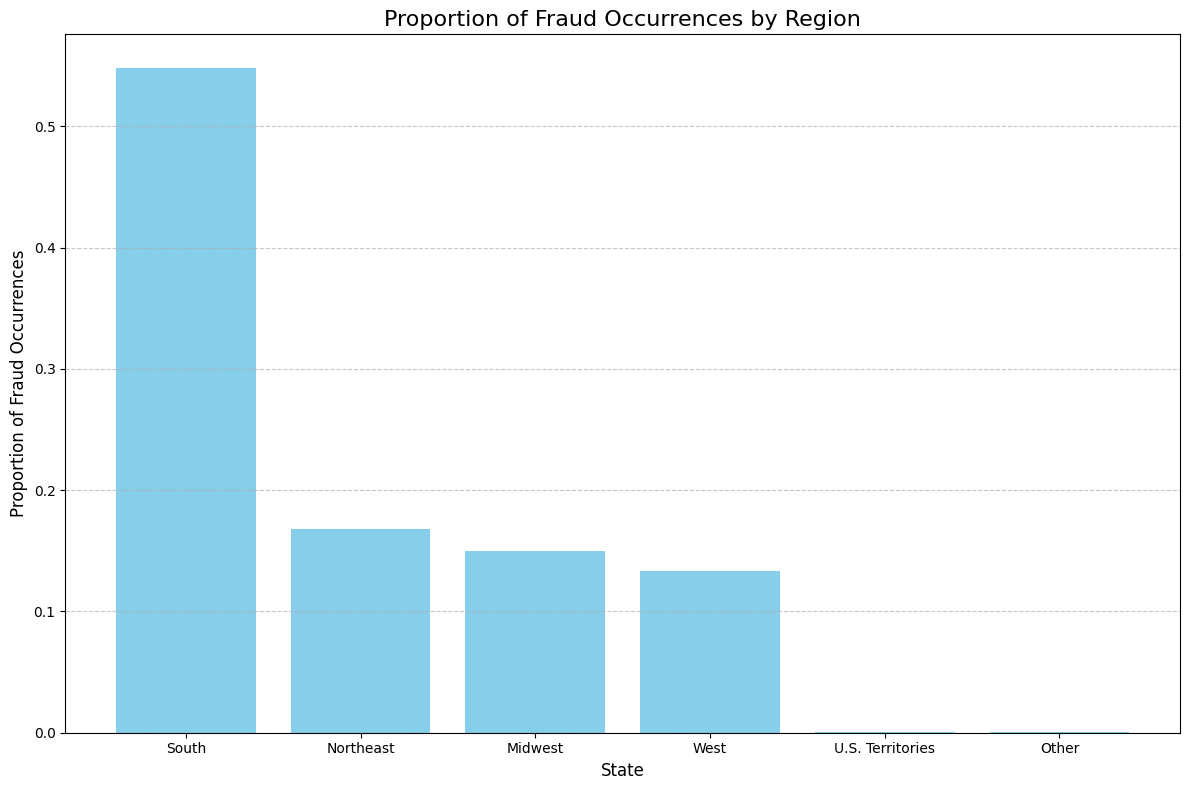

In [7]:
# calculate the proportion of fraud by region
fraud_by_state = data_cargo_fraud['region_name'].value_counts(normalize=True).sort_values(ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(fraud_by_state.index, fraud_by_state.values, color='skyblue')
plt.title('Proportion of Fraud Occurrences by Region', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Proportion of Fraud Occurrences', fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


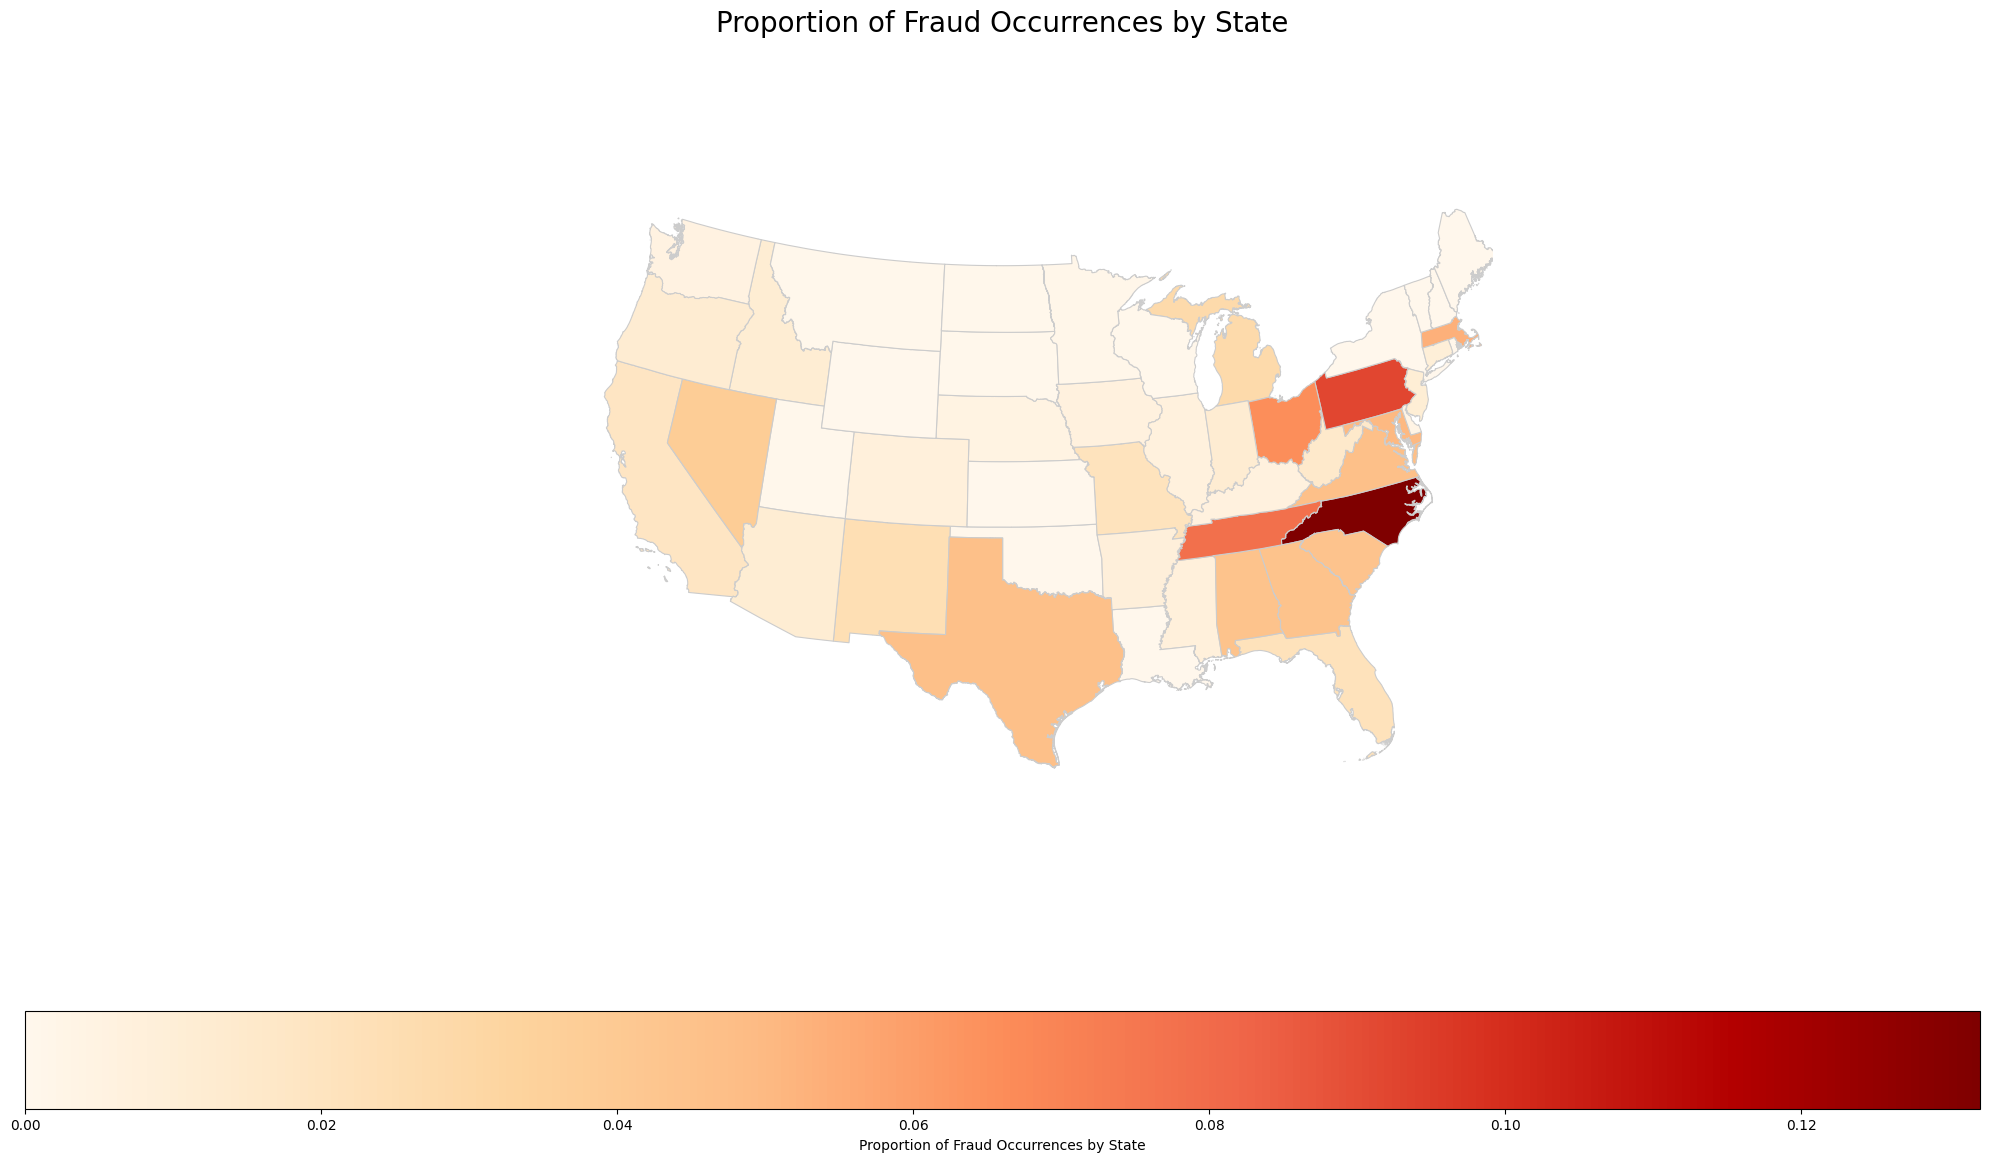

In [30]:
# calculate the proportion of fraud by state
fraud_by_state = data_cargo_fraud['state_name'].value_counts(normalize=True).sort_values(ascending=False)

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# merge the geopandas file and fraud data
merged = usa.merge(fraud_by_state, how='left', left_on='NAME', right_on='state_name')
merged['proportion'] = merged['proportion'].fillna(0)

# exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI'])]

# reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# plot the map
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
visframe.plot(column='proportion',
              cmap='OrRd',
              linewidth=0.8,
              ax=ax,
              edgecolor='0.8',
              legend=True,
              legend_kwds={
                  'label': "Proportion of Fraud Occurrences by State",
                  'orientation': "horizontal"
              })

ax.set_xlim([-2.5e6, 2.5e6])
ax.set_ylim([-2.5e6, 1.5e6])

ax.set_axis_off()
ax.set_title('Proportion of Fraud Occurrences by State', fontdict={'fontsize': 20}, pad=20)
plt.tight_layout()
plt.show()

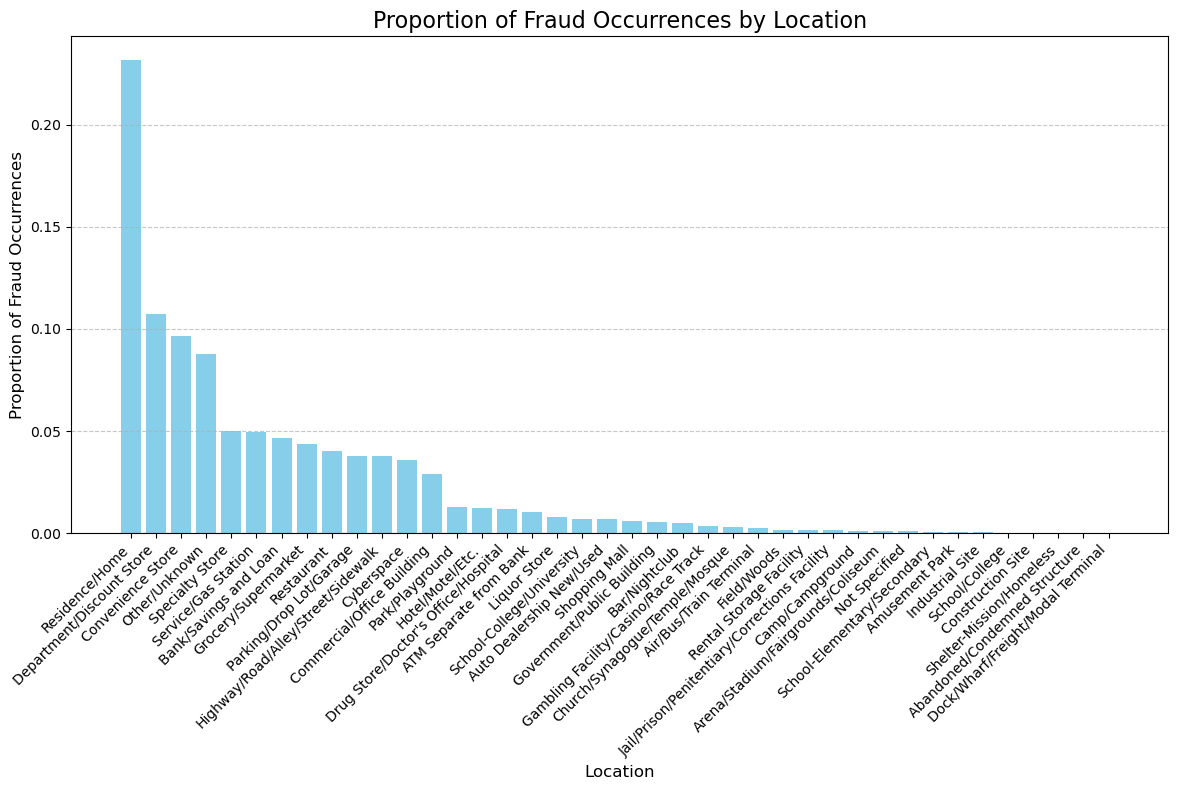

In [30]:
# calculate the proportion of fraud by state
fraud_by_state = data_cargo_fraud['location_name'].value_counts(normalize=True).sort_values(ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(fraud_by_state.index, fraud_by_state.values, color='skyblue')
plt.title('Proportion of Fraud Occurrences by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Proportion of Fraud Occurrences', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

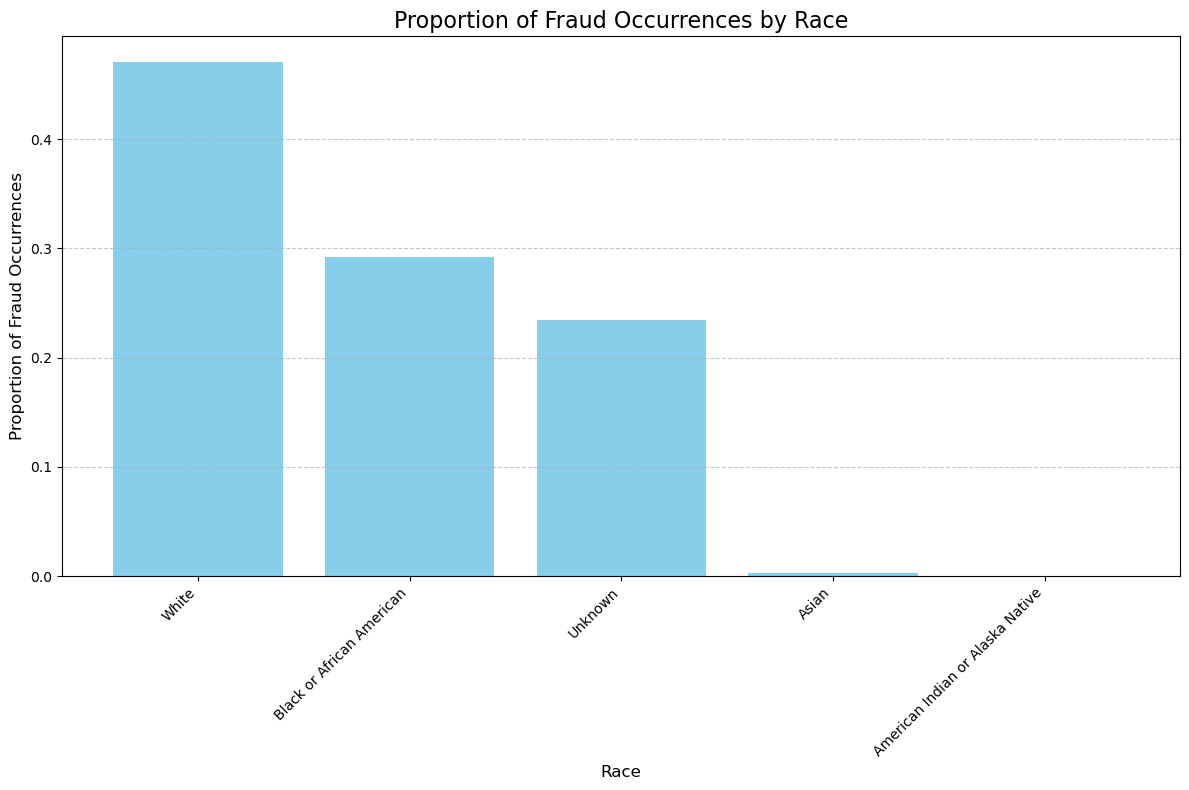

In [31]:
# calculate the proportion of fraud by state
fraud_by_state = data_cargo_fraud['offender_race'].value_counts(normalize=True).sort_values(ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(fraud_by_state.index, fraud_by_state.values, color='skyblue')
plt.title('Proportion of Fraud Occurrences by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Proportion of Fraud Occurrences', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

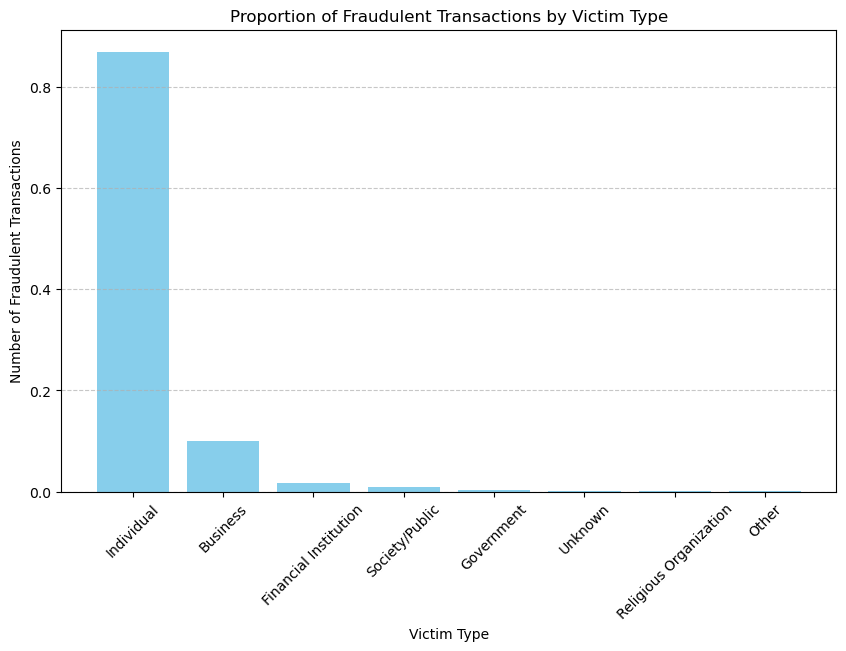

In [32]:
# count the occurrences of fraud by victim type
fraud_by_type = data_cargo_fraud['victim_type_name'].value_counts(normalize=True).sort_values(ascending=False)

# plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(fraud_by_type.index, fraud_by_type.values, color='skyblue')
plt.xlabel('Victim Type')
plt.xticks(rotation=45)
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Proportion of Fraudulent Transactions by Victim Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

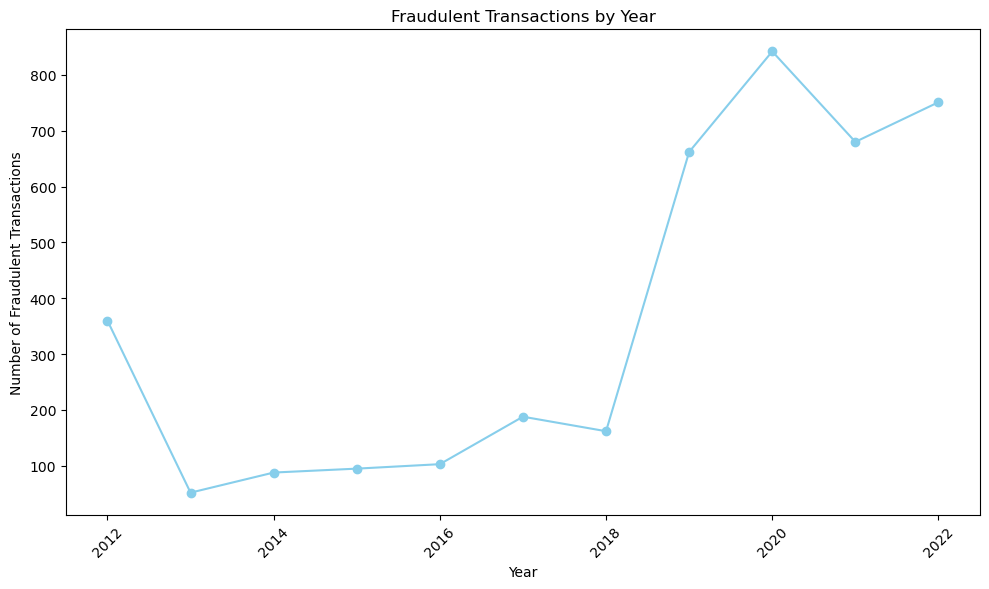

In [33]:
# count the occurrences of fraud by year
fraud_by_year = data_cargo_fraud['data_year'].value_counts().sort_index()

# plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(fraud_by_year.index, fraud_by_year.values, color='skyblue', marker='o')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Year')
plt.tight_layout() 
plt.show()
plt.show()

In [32]:
data_arrest = pd.read_csv("https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/refs/heads/main/fraud_onemonth_data.csv", index_col=0)
data_arrest = data_arrest.reset_index()
data_arrest.head()

,Identifier,State Code,ORI Code,Group,Division,Year,MSA,Offense Code,Male Under 10,Male 10-12,...,Juvenile White,Juvenile Black,Juvenile Indian,Juvenile Asian,Juvenile Hispanic,Adult White,Adult Black,Adult Indian,Adult Asian,Adult Hispanic
0,3,50,AK00101,1C,9.0,22,38.0,110,0,0.0,...,2.0,4.0,1.0,0.0,0.0,33.0,16.0,14.0,6.0,0.0
1,3,50,AK00102,4,9.0,22,58.0,110,0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,4.0,0.0,0.0
2,3,50,AK00103,4,9.0,22,0.0,110,0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0
3,3,50,AK00104,6,9.0,22,0.0,110,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,50,AK00108,6,9.0,22,0.0,110,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
# converting State Code column to str type
data_arrest['State Code'] = data_arrest['State Code'].astype(str).str.strip()

# dictionary of state codes to state
state_codes = {
    '50': 'Alaska',
    '01': 'Alabama',
    '03': 'Arkansas',
    '54': 'American Samoa',
    '02': 'Arizona',
    '04': 'California',
    '05': 'Colorado',
    '06': 'Connecticut',
    '52': 'Canal Zone',
    '08': 'District of Columbia',
    '07': 'Delaware',
    '09': 'Florida',
    '10': 'Georgia',
    '55': 'Guam',
    '51': 'Hawaii',
    '14': 'Iowa',
    '11': 'Idaho',
    '12': 'Illinois',
    '13': 'Indiana',
    '15': 'Kansas',
    '16': 'Kentucky',
    '17': 'Louisiana',
    '20': 'Massachusetts',
    '19': 'Maryland',
    '18': 'Maine',
    '21': 'Michigan',
    '22': 'Minnesota',
    '24': 'Missouri',
    '23': 'Mississippi',
    '25': 'Montana',
    '26': 'Nebraska',
    '32': 'North Carolina',
    '33': 'North Dakota',
    '28': 'New Hampshire',
    '29': 'New Jersey',
    '30': 'New Mexico',
    '27': 'Nevada',
    '31': 'New York',
    '34': 'Ohio',
    '35': 'Oklahoma',
    '36': 'Oregon',
    '37': 'Pennsylvania',
    '53': 'Puerto Rico',
    '38': 'Rhode Island',
    '39': 'South Carolina',
    '40': 'South Dakota',
    '41': 'Tennessee',
    '42': 'Texas',
    '43': 'Utah',
    '62': 'Virgin Islands',
    '45': 'Virginia',
    '44': 'Vermont',
    '46': 'Washington',
    '48': 'Wisconsin',
    '47': 'West Virginia',
    '49': 'Wyoming'
}

# map the state codes to state names
data_arrest['State'] = data_arrest['State Code'].map(state_codes)
data_arrest.head()

,Identifier,State Code,ORI Code,Group,Division,Year,MSA,Offense Code,Male Under 10,Male 10-12,...,Juvenile Black,Juvenile Indian,Juvenile Asian,Juvenile Hispanic,Adult White,Adult Black,Adult Indian,Adult Asian,Adult Hispanic,State
0,3,50,AK00101,1C,9.0,22,38.0,110,0,0.0,...,4.0,1.0,0.0,0.0,33.0,16.0,14.0,6.0,0.0,Alaska
1,3,50,AK00102,4,9.0,22,58.0,110,0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,4.0,0.0,0.0,Alaska
2,3,50,AK00103,4,9.0,22,0.0,110,0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,Alaska
3,3,50,AK00104,6,9.0,22,0.0,110,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Alaska
4,3,50,AK00108,6,9.0,22,0.0,110,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Alaska


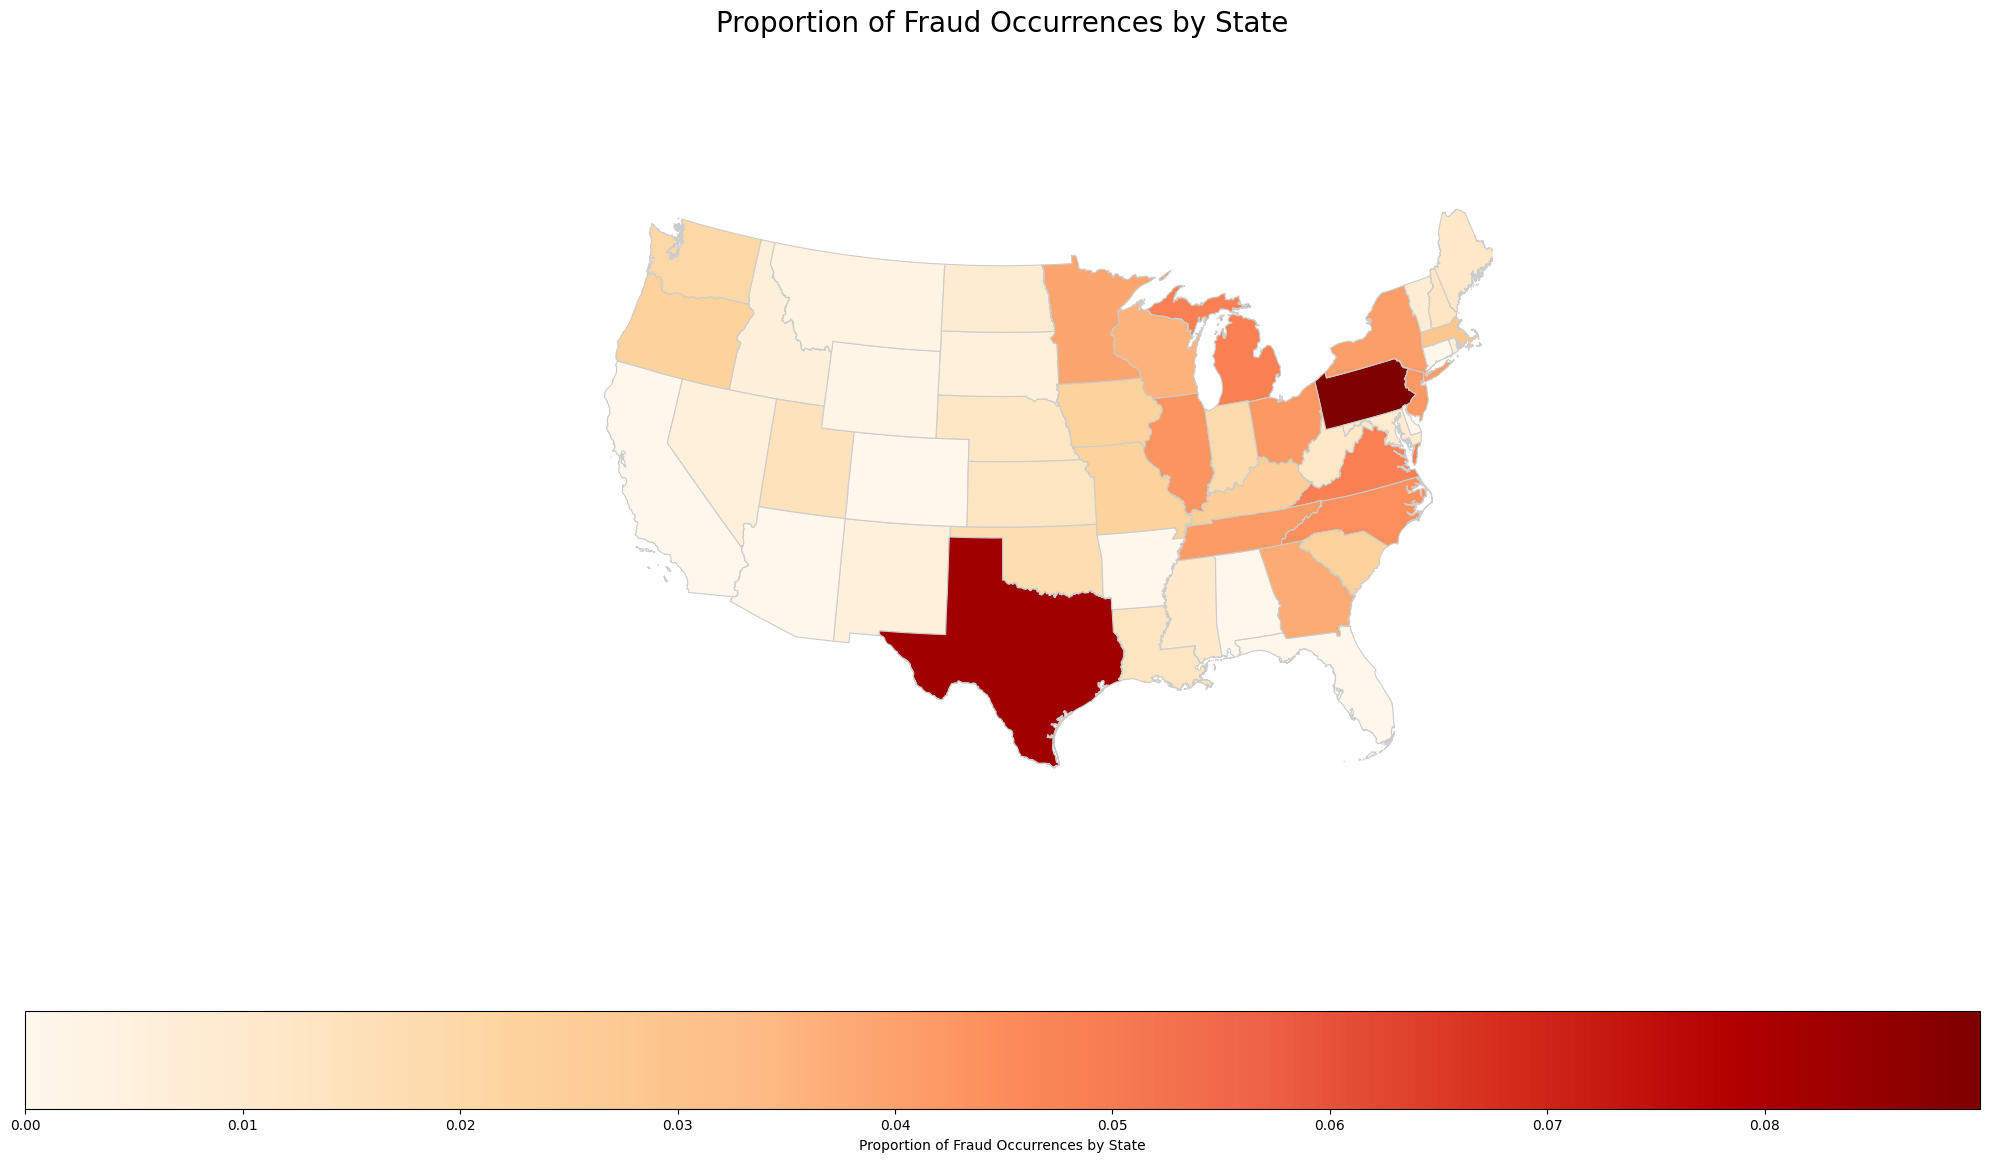

In [34]:
# calculate the proportion of fraud by state
fraud_by_state = data_arrest['State'].value_counts(normalize=True).sort_values(ascending=False)

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# merge the geopandas file and fraud data
merged = usa.merge(fraud_by_state, how='left', left_on='NAME', right_on='State')
merged['proportion'] = merged['proportion'].fillna(0)

# exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI'])]

# reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# plot the map
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
visframe.plot(column='proportion',
              cmap='OrRd',
              linewidth=0.8,
              ax=ax,
              edgecolor='0.8',
              legend=True,
              legend_kwds={
                  'label': "Proportion of Fraud Occurrences by State",
                  'orientation': "horizontal"
              })

ax.set_xlim([-2.5e6, 2.5e6])
ax.set_ylim([-2.5e6, 1.5e6])

ax.set_axis_off()
ax.set_title('Proportion of Fraud Occurrences by State', fontdict={'fontsize': 20}, pad=20)
plt.tight_layout()
plt.show()

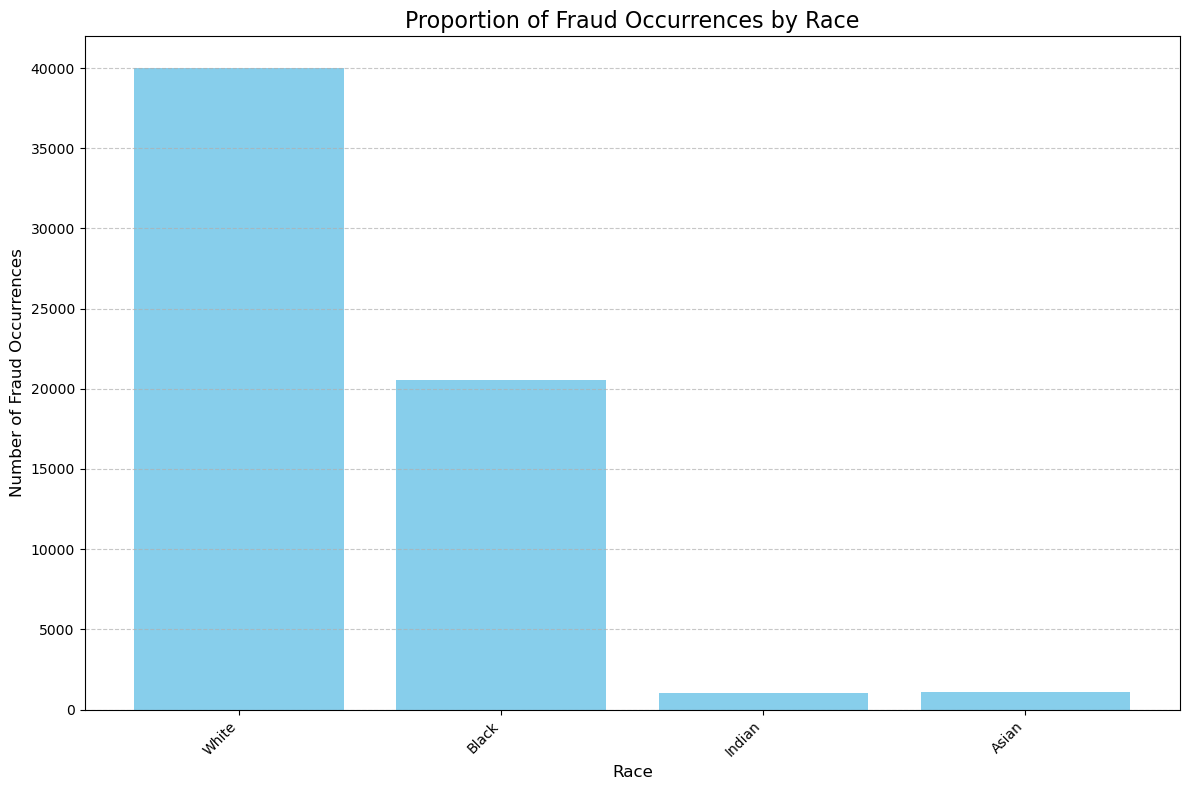

In [37]:
# calculate the occurrences of fraud by race
fraud_adult_white = data_arrest['Adult White'].sum()
fraud_adult_black = data_arrest['Adult Black'].sum()
fraud_adult_indian = data_arrest['Adult Indian'].sum()
fraud_adult_asian = data_arrest['Adult Asian'].sum()

# combine the counts into a single Series
fraud_by_race = pd.Series({
    'White': fraud_adult_white,
    'Black': fraud_adult_black,
    'Indian': fraud_adult_indian,
    'Asian': fraud_adult_asian
})

# plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(fraud_by_race.index, fraud_by_race.values, color='skyblue')
plt.title('Proportion of Fraud Occurrences by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of Fraud Occurrences', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()